In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Data Preprocessing

In [3]:
df = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
df.head()

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False


In [4]:
# find any missing values
#df.info()

In [5]:
# counts = df['y_Ligand'].value_counts() / len(df)
# counts.plot.bar()
# plt.title('Percentage of binding and non-binding residue')
# plt.show()

In [6]:
y = df["y_Ligand"].astype(int)
y = np.array(y)

In [7]:
# dropping columns
df_x = df.drop(['annotation_sequence', 'annotation_atomrec', 'entry', 'y_Ligand'], axis=1)

# convert boolean columns into integer
df_x[df_x.select_dtypes(include='bool').columns] = df_x.select_dtypes(include='bool').astype(int)

df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 759
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   feat_A        497166 non-null  int32  
 1   feat_C        497166 non-null  int32  
 2   feat_D        497166 non-null  int32  
 3   feat_E        497166 non-null  int32  
 4   feat_F        497166 non-null  int32  
 5   feat_G        497166 non-null  int32  
 6   feat_H        497166 non-null  int32  
 7   feat_I        497166 non-null  int32  
 8   feat_K        497166 non-null  int32  
 9   feat_L        497166 non-null  int32  
 10  feat_M        497166 non-null  int32  
 11  feat_N        497166 non-null  int32  
 12  feat_P        497166 non-null  int32  
 13  feat_Q        497166 non-null  int32  
 14  feat_R        497166 non-null  int32  
 15  feat_S        497166 non-null  int32  
 16  feat_T        497166 non-null  int32  
 17  feat_V        497166 non-null  int32  
 18  feat_W 

In [8]:
x_train, x_val, y_train, y_val = train_test_split(df_x, y)

In [9]:
# scaling
numeric_cols = x_train.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numeric_cols])
x_val_scaled = scaler.fit_transform(x_val[numeric_cols])
x_train_scaled

array([[-0.27142904, -0.14558469, -0.23236873, ...,  0.67526137,
        -1.64581019, -0.57098393],
       [-0.27142904, -0.14558469, -0.23236873, ..., -1.01525637,
        -0.34516831, -0.70446581],
       [-0.27142904, -0.14558469, -0.23236873, ...,  0.87845701,
        -0.67976176, -0.33101651],
       ...,
       [-0.27142904, -0.14558469, -0.23236873, ..., -0.06204983,
        -0.24075805, -0.59948006],
       [-0.27142904, -0.14558469, -0.23236873, ..., -1.96914147,
         0.17256544, -0.01155987],
       [-0.27142904, -0.14558469, -0.23236873, ..., -0.10024595,
        -0.58045747,  1.85868627]])

## First model (using first 1000 rows of dataset)

In [10]:
x_train.shape

(372874, 46)

In [31]:
num_partial = 1000
x_train_par = x_train[:num_partial]
y_train_par = y_train[:num_partial]
x_val_par = x_val[:num_partial]
y_val_par = y_val[:num_partial]

In [29]:
clf1 = SVC(kernel='linear', C=0.5, class_weight='balanced')

In [30]:
clf1.fit(x_train_par, y_train_par)

SVC(C=0.5, class_weight='balanced', kernel='linear')

In [32]:
pred_par = clf1.predict(x_val_par)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       955
           1       0.10      0.58      0.17        45

    accuracy                           0.75      1000
   macro avg       0.54      0.67      0.51      1000
weighted avg       0.94      0.75      0.82      1000



Text(0.5, 23.52222222222222, 'Predicted')

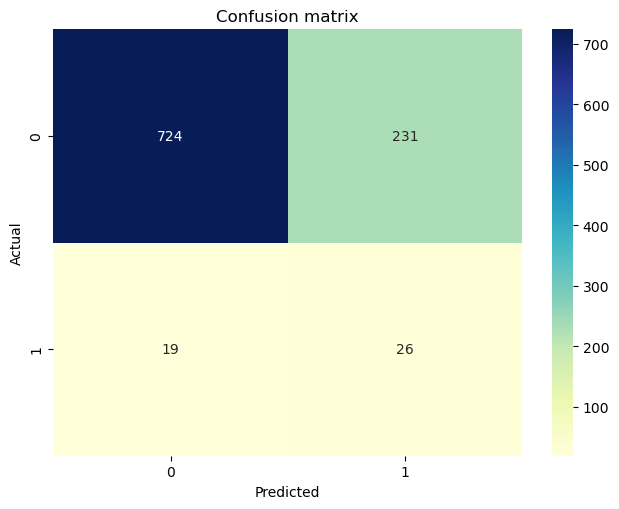

In [33]:
# evaluation
print(classification_report(y_val_par, pred_par))

cnf_matrix = confusion_matrix(y_val_par, pred_par)

classes = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Grid search for best parameter

In [37]:
# get small row of data to run fast
def grid_search(c_val, num_partial):
    for x in c_val:
        print('Current C value:', x)
        clf = SVC(kernel='linear', C=x, class_weight='balanced')

        for i in num_partial:
            x_train_par = x_train[:i]
            y_train_par = y_train[:i]
            x_val_par = x_val[:i]
            y_val_par = y_val[:i]

            print('Training with first {} datasets'.format(i))
            clf.fit(x_train_par, y_train_par)
            pred = clf.predict(x_val_par)
            print(classification_report(y_val_par, pred))
            print(confusion_matrix(y_val_par, pred))
        
        print('============')

In [38]:
grid_search(c_val=[1, 0.7, 0.5, 0.3], num_partial=[1000, 5000, 10000])

Current C value: 1
Training with first 1000 datasets
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       955
           1       0.09      0.51      0.16        45

    accuracy                           0.75      1000
   macro avg       0.53      0.64      0.50      1000
weighted avg       0.93      0.75      0.82      1000

[[728 227]
 [ 22  23]]
Training with first 5000 datasets
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      4831
           1       0.07      0.79      0.12       169

    accuracy                           0.62      5000
   macro avg       0.53      0.71      0.44      5000
weighted avg       0.96      0.62      0.74      5000

[[2986 1845]
 [  35  134]]
Training with first 10000 datasets
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      9639
           1       0.07      0.78      0.13       361

    accura